## Intro into MathExpression & Functions Class

In [6]:
from functions import MathExpression

# Create a MathExpression object
value = MathExpression(1)

# Print the value
print(value)

# multiply the value by some other value
scalar = MathExpression(3)
product = value * scalar
print(product)


# find out the partial derivative of the product with respect to the value
product.backward()
dPdV = value.grad
print("d Product / d Value =", dPdV)

Math(1)
Math(Math(1) * Math(3))=3
d Product / d Value = Math(Math(Math(3) * 1)=3 + 0)=3


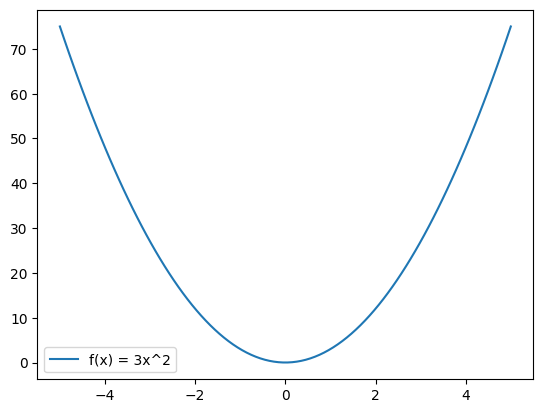

In [7]:
# Use MathExpression on a function
from functions import FunctionOverX
from functions import PlotFunctions

f_x = FunctionOverX(lambda x: 3 * x**2)

PlotFunctions([("f(x) = 3x^2", f_x)]).plot()


f_x(2): 12
f_x(-3): 27
f_x'(2): 12
f_x''(2): 12
f_x'(-3): 27
f_x''(-3): -18


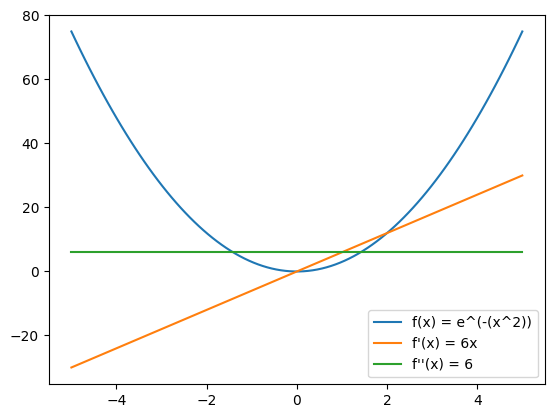

In [8]:
# get the value of f(x) at x = 2 and x = -3
print("f_x(2):", f_x(2))
print("f_x(-3):", f_x(-3))

# calculate the first 2 derivatives of f(x) at x = 2 and x = -3
# using a generator function for efficiency in most use cases
first_and_second_derivative_at_2 = list(f_x.first_n_th_derivative_at(2, 2))
first_and_second_derivative_at_minus3 = list(f_x.first_n_th_derivative_at(-3, 2))

print("f_x'(2):", first_and_second_derivative_at_2[0])
print("f_x''(2):", first_and_second_derivative_at_2[1])
print("f_x'(-3):", first_and_second_derivative_at_minus3[0])
print("f_x''(-3):", first_and_second_derivative_at_minus3[1])

# plot the derivatives over many x values (default -5 to 5)

first_derivative = f_x.n_th_derivative(1)
second_derivative = f_x.n_th_derivative(2)

PlotFunctions([("f(x) = e^(-(x^2))", f_x),
                ("f'(x) = 6x", first_derivative),
                ("f''(x) = 6", second_derivative)]).plot()


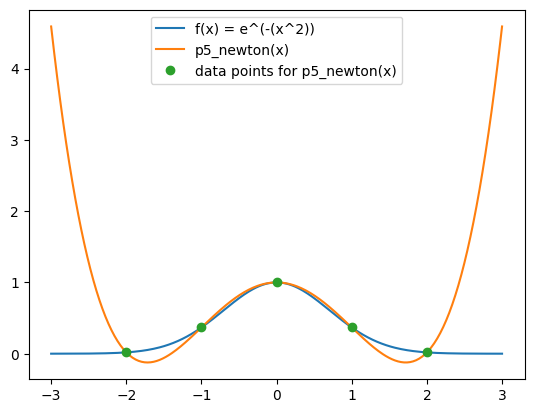

In [9]:
## Interpolate with Newton's Divided Differences

from interpolation_methods import Newton
from divided_differences import SupportPointList, SupportingPoint

# choose a non polynomial function
f_x = FunctionOverX(lambda x: (-x**2).exp())


# create Stuetzstellen object
spl = SupportPointList()
spl.add(SupportingPoint(-2, f_x(-2)))
spl.add(SupportingPoint(-1, f_x(-1)))
spl.add(SupportingPoint(0, f_x(0)))
spl.add(SupportingPoint(1, f_x(1)))
spl.add(SupportingPoint(2, f_x(2)))

# create Newton object
newton = Newton(spl)
p5_newton = newton.interpolate()

# plot the interpolated function
PlotFunctions([("f(x) = e^(-(x^2))", f_x),
                ("p5_newton(x)", p5_newton, spl.get_xlist(), spl.get_ylist())]).plot(-3, 3, 50)

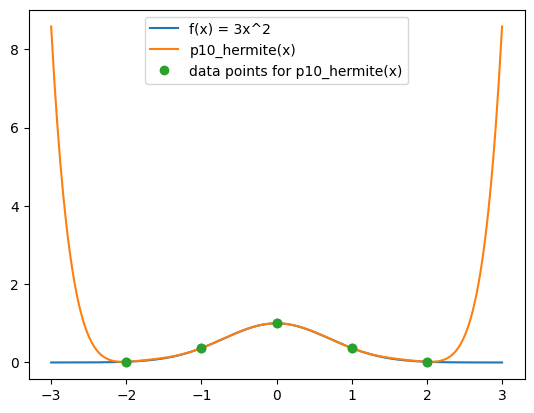

In [10]:
### Hermite Interpolation

from interpolation_methods import Hermite

p10 = Hermite(f_x)
p10.generateDataPoints(5, 2, -2, 2) # at 5 x positions, using f and f', over the interval [-2, 2]
p10_hermite = p10.interpolate()

PlotFunctions([("f(x) = 3x^2", f_x),
                ("p10_hermite(x)", p10_hermite, p10.spl.get_xlist(), p10.spl.get_ylist())]).plot(-3, 3, 50)